In [34]:
%pylab inline
style.use('ggplot')
import datetime
from scipy.optimize import curve_fit,brentq

Populating the interactive namespace from numpy and matplotlib


Es Mayo de 2014 y usted esta muy emocionado con la Copa Mundial de Futbol, y en particular, con llenar el album del mundial. Para llenarlo usted debe comprar laminas (una a la vez) seleccionandolas de manera aleatoria. Asuma que el   album completo tiene un total de 640 laminas. Entre estas hay 40 laminas especiales y 40 l ́aminas hologr ́aficas. Cada una tiene un costo de 2500 COP. Su objetivo es llenar todo el  ́album y estimar el costo de hacerlo!

In [35]:
n  = 640.0 # Numero de laminas
c = 1200.0/5.0 # Costo de una lamina

In [5]:
def llenar_album(n):
    # n Numero de laminas
    # Devuelve el numero de laminas que hay que comprar para llenar el album
    album = zeros(n)
    n_album = 0
    l_compradas = 0
    while n_album < n:
        mona = randint(low=0, high=n) # Compro lamina
        l_compradas += 1
        if album[mona] == 0: # Si no la tengo, la agrego al album
            album[mona] = 1
            n_album += 1
    return l_compradas

####Datos Experimentales
Los datos que a continuacion se cargan fueron generados usando los cripts de la carpeta _./remote_simulation_. Las simulaciones se corrieron de forma remota usando los recursos de **compufisica**.
En el archivo **album_facil.csv** se recopilan los datos generados.

####Cargar Datos

In [6]:
M,Media,Varianza = genfromtxt('Album_facil.csv',delimiter=',',unpack=True)
# Los datos generados en 'Album_facil.csv' contienen el numero de albumes M, el promedio de fichas para llenar los albums
# (Media) y la varianza de las fichas para llenar los albumes

In [7]:
#Media y varianza tienen unidades de intentos
Media_c = Media*c
Varianza_c = Varianza*(c**2)
Sigma_c = sqrt(Varianza)*c

Mu_mean = sum(M*Media_c)/sum(M)
S_mean = sum(M*Sigma_c)/sum(M)

El costo ponderado de llenar el album es de:1080801 $
La desviacion estandar pondeara para llenar el album es de :196020 $


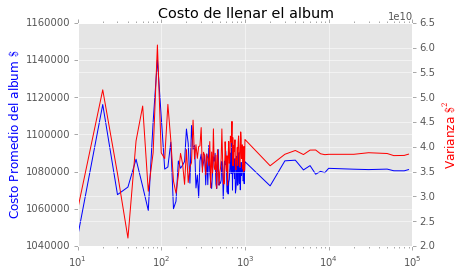

In [8]:
fig1,ax1 = subplots()
ax1.semilogx(M,Media_c,'b')
ax1.set_ylabel('Costo Promedio del album $\$$',color='b')
ax2 = ax1.twinx()
ax2.semilogx(M,Varianza_c,'r')
ax2.set_ylabel('Varianza $\$^2$',color='r')
title('Costo de llenar el album')
print('El costo ponderado de llenar el album es de:%.0f $'%Mu_mean)
print('La desviacion estandar pondeara para llenar el album es de :%.0f $'%S_mean)

Para llenar el album del mundial con: $$n=640$$ $$c=240\$$$
Y asumiendo que todas las $640$ fichas se obtienen con la misma probabilidad se tienen los sigueintes resultados
- Con un $95\%$ de confiabilidad, el costo de llenar el album se ecuentra entre $$1.080.801\$\pm 196.020\$$$

#####Analisis de Residuales
Para analizar los residuales de la simulacion se define la variable:
$$\epsilon = |\mu_m-\mu|$$
Para calcular la varianza de la variable $\epsilon$ se usa el resultado de la varianza:
$$Var[X]=E[X^2]-\mu^2$$
$$\mu=E[X]$$
$$\rightarrow Var[\epsilon]=E[\epsilon^2]-\mu^2$$
$$\mu=E[\epsilon]$$

In [9]:
#Defino la nueva variable e
# Hago la definicion de e con el promedio ponderado de los datos acumulados hasta la observacion i
e_m = zeros(len(Media))
for i in range(len(Media)):
    e_m[i] = abs(sum(M[0:i+1]*Media_c[0:i+1])/sum(M[0:i+1]) - Media_c[i])
    
Var_e = zeros(len(Media))
for i in range(len(Media)):
    Var_e[i] = mean(e_m[0:i+1]**2) - (mean(e_m[0:i+1]))**2
e_s = sqrt(Var_e)
e_95_1 = e_m+2.0*e_s
e_95_2 = zeros(len(e_s))
for i in range(len(e_m)):
    if e_m[i]-e_s[i]<0:
        e_95_2[i] = 1e-1 # e no puede ser negativo, entonces cambio los valores negativos a 1e-1
    else:
        e_95_2[i] = e_m[i]-e_s[i]

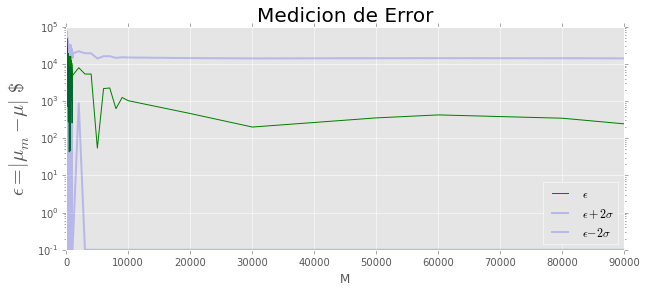

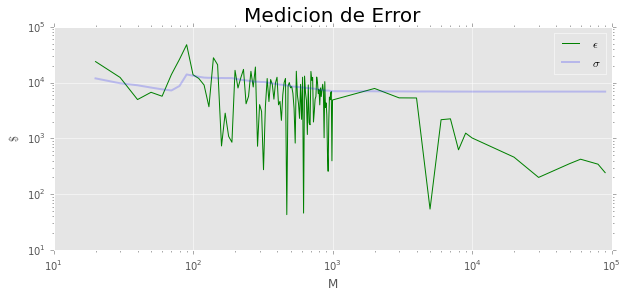

In [10]:
figure(figsize=(10,4))
semilogy(M[1:],e_m[1:],'g',label='$\epsilon$')
xlabel('M'); ylabel(r'$\epsilon=|\mu_m-\mu|$ $\$$',size=20);title('Medicion de Error',size=20)
semilogy(M[1:],e_95_1[1:],'b',alpha=0.2,linewidth=2.0,label='$\epsilon+2\sigma$')
semilogy(M[1:],e_95_2[1:],'b',alpha=0.2,linewidth=2.0,label='$\epsilon-2\sigma$')
legend(loc='best');show()

figure(figsize=(10,4))
loglog(M[1:],e_m[1:],'g',label='$\epsilon$')
loglog(M[1:],e_s[1:],'b',alpha=0.2,linewidth=2.0,label='$\sigma$')
xlabel('M'); ylabel(r'$\$$'); title('Medicion de Error',size=20)
legend();show()

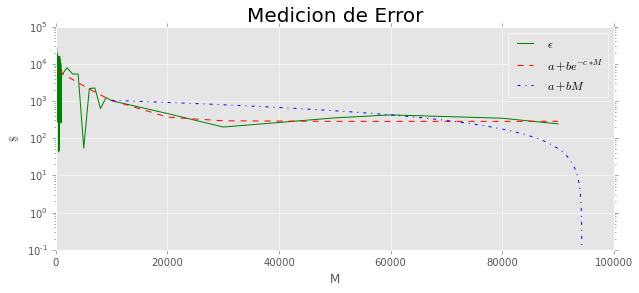

94266


In [46]:
# Estimar el valor de M para que e=10e-6
# Ajustar los datos a diferentes modelos
def ajuste(M,a,b,c):
    return a+b*exp(-c*M)
args_fit,info = curve_fit(ajuste,M[50:],e_m[50:],p0=(0,0,0))
args_p1 = polyfit(M[105:],e_m[105:],1)
p1 = poly1d(args_p1)
MM = linspace(1e4,1e5,5000)

figure(figsize=(10,4))
semilogy(M[1:],e_m[1:],'g',label='$\epsilon$')
#semilogy(M[1:],e_s[1:],'b',alpha=0.2,linewidth=2.0,label='$\sigma$')
semilogy(M[50:],ajuste(M[50:],args_fit[0],args_fit[1],args_fit[2]),'r--',label='$a+be^{-c*M}$')
semilogy(MM,p1(MM),'b-.',label='$a+bM$')

xlabel('M'); ylabel(r'$\$$'); title('Medicion de Error',size=20)
#ylim([0,1e4])
legend();show()
def p1_r(x):
    return p1(x) -1e-6
rr = brentq(p1_r,a=9e4,b=1e5)
print('%.0f'%rr)

Las graficas superiores muestran los residuales de la simulacion.

Las simulaciones para llenar menos de $10^4$ albums presentan variablidad del orden de $10^3COP$.

De $10^4$ a $10^5$ albums llenados, se presenta variaciones del orden de $10^2COP$. En terminos practicos, una varaciones de _cientos de pesos colombianos_ se considera suficientemente acertada por ser una cantidad de dinero pequeña.

Ahora bien, una desviacion estandar de $10^{-6}COP$ en el calculo de los residuales se considera una sobreestimación (_overfit_) de los resultados y un uso excesivvo y no-practico de recursos computacionales. A opinion de los autores, los resultados simulados son suficientemente precisos para la estimacion requerida en el problema.

Haciendo un par de ajustes a la variable $\epsilon$, se estima que para muestras de $M>10^5$ se puede obtener un 95% de confiabilidad en que $\epsilon \sim 10^{-6}$

#No-equiprobable (Album_dificil)
El album tiene $640$ laminas, de las cuales $40$ son holográficas y $40$ sons Especiales. Se asumen las probabilidades:
$$P_{holog}=\frac{1}{3}P_{normal}$$
$$P_{esp}=\frac{1}{6}P_{normal}$$
Se sabe que la suma de las probabilidades es $1$
$$P_{normal}+P_{holog}+P_{esp}=1$$
$$P_{normal}\left(1+\frac{1}{3}+\frac{1}{6}\right)=1$$
$$P_{normal}\left(\frac{6+2+1}{6}\right)=\frac{3}{2}P_{normal}=1$$
$$\rightarrow P_{normal}=\frac{2}{3}$$
$$\rightarrow P_{holog}=\frac{2}{9}$$
$$\rightarrow P_{esp}=\frac{1}{9}$$

In [47]:
n = 640 # total

def llenar_album_dificil(n): # n es el numero total de fichas
    n_h = 40  # holograficas
    n_e = 40  # especiales
    n_n = n - n_h - n_e
    
    album_n = zeros(n_n)
    album_h = zeros(n_h) #album holografico
    album_e = zeros(n_e)
    n_total = 0
    l_compradas = 0
    while n_total < n:
        tipo = randint(low=0,high=3) # Ver que tipo de mona es
        l_compradas += 1 # Compro la lamina
        if tipo == 2: # Mona es holografica o especial
            tipo2 = randint(low=0,high=3) # Ver que tipo de mona es
            if tipo2 == 2: # Mona es especial
                mona = randint(low=0, high=n_e) # Mona especial
                if album_e[mona] == 0: # Si no la tengo, la agrego al album
                    album_e[mona] = 1
                    n_total += 1
            else: # Mona es holografica
                mona = randint(low=0, high=n_h) # Mona holografica
                if album_h[mona] == 0: # Si no la tengo, la agrego al album
                    album_h[mona] = 1
                    n_total += 1
        else: # Mona es normal
            mona = randint(low=0, high=n_n) # Mona normal
            if album_n[mona] == 0: # Si no la tengo, la agrego al album
                album_n[mona] = 1
                n_total += 1
    return l_compradas # Devuelvo el numero de laminas simulado para llenar el album

In [ ]:
#Forma Lenta
print(datetime.datetime.now())
M = arange(1000,100000,1000)
Media = zeros(len(M))
Varianza = zeros(len(M))

for i in range(len(M)):
    m  = M[i] # numero de albumes a llenar
    
    N_fichas = zeros(m) # numero de fichas para llenar album
    for j in range(m):    
        N_fichas[j] = llenar_album(n) # Calcular numero de fichas
    Costo = N_fichas*c # Calcular costo
    Media[i] = mean(Costo)
    Varianza[i] = var(Costo)
    
    if m%500 == 0:
        print(m,end=' ')

#Guardar datos    
Data = vstack((M,Media,Varianza)).T
savetxt('Album_dificl_lento.csv',Data,delimiter=',')    
print(datetime.datetime.now())

In [25]:
# Metodo rapido
# En este caso se generan los datos con el siguiente metodo que reduce el tiepo computacional requerido
print(datetime.datetime.now())
n = 640
M = arange(10,100000,10)
Media = zeros(len(M))
Varianza = zeros(len(M))
N_fichas = zeros(len(M)*10)

for i in range(len(M)):
    m = 10
    n_fichas = zeros(m)
    for j in range(m):
        n_fichas[j] = llenar_album_dificil(n)
    N_fichas[i*10 : (i+1)*10] = n_fichas
    Media[i] = mean(N_fichas[0:(i+1)*10])
    #print(shape((N_fichas[0:(i+1)*10])))
    Varianza[i] = var(N_fichas[0:(i+1)*10])
    if M[i]%1000 == 0:
        print(M[i],end=' ')

#Guardar datos
Data = vstack((M,Media,Varianza)).T
savetxt('Album_dificl.csv',Data,delimiter=',')
print(datetime.datetime.now())
!ls

2015-05-04 16:06:08.154966
1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000 81000 82000 83000 84000 85000 86000 87000 88000 89000 90000 91000 92000 93000 94000 95000 96000 97000 98000 99000 2015-05-04 16:38:10.216232
Album_dificl.csv  Data.csv  P1_Album_mundial.ipynb


In [55]:
M,Media,Varianza = genfromtxt('Album_dificl.csv',delimiter=',',unpack=True)

In [56]:
#Media y varianza tienen unidades de intentos
Media_c = Media*c
Varianza_c = Varianza*(c**2)
Sigma_c = sqrt(Varianza)*c

Mu_mean = sum(M*Media_c)/sum(M)
S_mean = sum(M*Sigma_c)/sum(M)

El costo ponderado de llenar el album es de:1391521 $
La desviacion estandar pondeara para llenar el album es de :257915 $


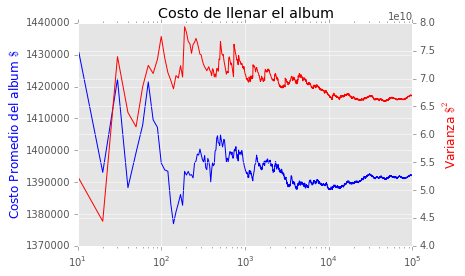

In [57]:
fig1,ax1 = subplots()
ax1.semilogx(M,Media_c,'b')
ax1.set_ylabel('Costo Promedio del album $\$$',color='b')
ax2 = ax1.twinx()
ax2.semilogx(M,Varianza_c,'r')
ax2.set_ylabel('Varianza $\$^2$',color='r')
title('Costo de llenar el album')
print('El costo ponderado de llenar el album es de:%.0f $'%Mu_mean)
print('La desviacion estandar pondeara para llenar el album es de :%.0f $'%S_mean)

In [60]:
#Defino la nueva variable e
# Hago la definicion de e con el promedio ponderado de los datos acumulados hasta la observacion i
e_m = zeros(len(Media))
for i in range(len(Media)):
    e_m[i] = abs(sum(M[0:i+1]*Media_c[0:i+1])/sum(M[0:i+1]) - Media_c[i])
    
Var_e = zeros(len(Media))
for i in range(len(Media)):
    Var_e[i] = mean(e_m[0:i+1]**2) - (mean(e_m[0:i+1]))**2
e_s = sqrt(Var_e)
e_95_1 = e_m+2.0*e_s
e_95_2 = zeros(len(e_s))
for i in range(len(e_m)):
    if e_m[i]-e_s[i]<0:
        e_95_2[i] = 1e-1 # e no puede ser negativo, entonces cambio los valores negativos a 1e-1
    else:
        e_95_2[i] = e_m[i]-e_s[i]

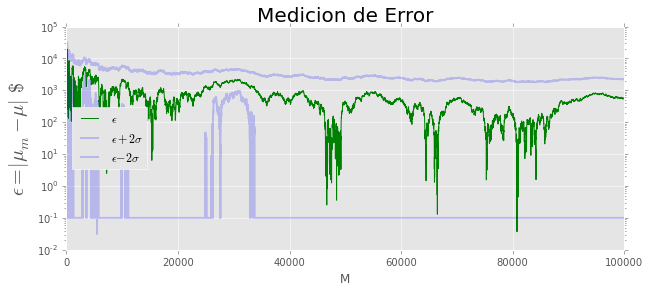

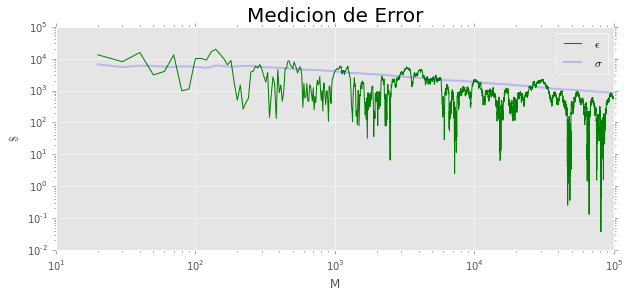

In [61]:
figure(figsize=(10,4))
semilogy(M[1:],e_m[1:],'g',label='$\epsilon$')
xlabel('M'); ylabel(r'$\epsilon=|\mu_m-\mu|$ $\$$',size=20);title('Medicion de Error',size=20)
semilogy(M[1:],e_95_1[1:],'b',alpha=0.2,linewidth=2.0,label='$\epsilon+2\sigma$')
semilogy(M[1:],e_95_2[1:],'b',alpha=0.2,linewidth=2.0,label='$\epsilon-2\sigma$')
legend(loc='best');show()

figure(figsize=(10,4))
loglog(M[1:],e_m[1:],'g',label='$\epsilon$')
loglog(M[1:],e_s[1:],'b',alpha=0.2,linewidth=2.0,label='$\sigma$')
xlabel('M'); ylabel(r'$\$$'); title('Medicion de Error',size=20)
legend();show()

#Otros Intentos

In [40]:
#Generacion alterna de datos
#La idea es usar los resultados de llenar m-1 albumes al momento de calcular los datos para m albumes
M = arange(10,100000,10)
Media = zeros(len(M))
Varianza = zeros(len(M))
N_fichas = zeros(len(M)*10)

for i in range(len(M)):
    m = 10
    n_fichas = zeros(m)
    for j in range(m):
        n_fichas[j] = llenar_album(n)
    N_fichas[i*10 : (i+1)*10] = n_fichas
    Media[i] = mean(N_fichas[0:(i+1)*10])
    #print(shape((N_fichas[0:(i+1)*10])))
    Varianza[i] = var(N_fichas[0:(i+1)*10])
    if M[i]%1000 == 0:
        print(M[i],end=' ')

# Guardar datos        
Data = vstack((M,Media,Varianza)).T
savetxt('Data.csv',Data,delimiter=',')
!ls

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 1850

In [34]:
M,Media,Varianza = genfromtxt('Data.csv',delimiter=',',unpack=True)

#Media y varianza tienen unidades de intentos
Media_c = Media*c
Varianza_c = Varianza*(c**2)
Sigma_c = sqrt(Varianza)*c

Mu_mean = mean(Media_c)
S_mean = mean(Sigma_c)

#Defino la nueva variable e
#e_m = abs(Mu_mean - Media_c)
e_m = zeros(len(Media))
for i in range(len(Media)):
    e_m[i] = abs(mean(Media_c[0:i+1]) - Media_c[i])
Var_e = zeros(len(Media))
for i in range(len(Media)):
    Var_e[i] = mean(e_m[0:i+1]**2) - (mean(e_m[0:i+1]))**2
e_s = sqrt(Var_e)

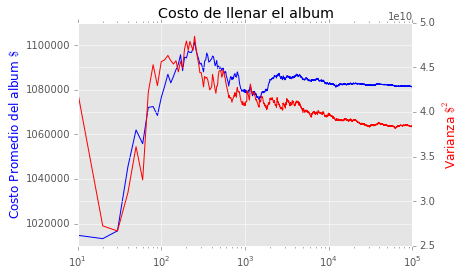

In [36]:
fig1,ax1 = subplots()
ax1.semilogx(M,Media_c,'b')
ax1.set_ylabel('Costo Promedio del album $\$$',color='b')
ax2 = ax1.twinx()
ax2.semilogx(M,Varianza_c,'r')
ax2.set_ylabel('Varianza $\$^2$',color='r')
title('Costo de llenar el album')

In [56]:
#Media y varianza tienen unidades de intentos
Media_c = Media*c
Varianza_c = Varianza*(c**2)
Sigma_c = sqrt(Varianza)*c

Mu_mean = mean(Media_c)
S_mean = mean(Sigma_c)

#Defino la nueva variable e
#e_m = abs(Mu_mean - Media_c)
e_m = zeros(len(Media))
for i in range(len(Media)):
    e_m[i] = abs(mean(Media_c[0:i+1]) - Media_c[i])
Var_e = zeros(len(Media))
for i in range(len(Media)):
    Var_e[i] = mean(e_m[0:i+1]**2) - (mean(e_m[0:i+1]))**2
e_s = sqrt(Var_e)

'\ne_m = zeros(len(Media))\nfor i in range(len(Media)):\n    e_m[i] = abs(mean(Media_c[0:i+1]) - Media_c[i])\nVar_e = zeros(len(Media))\nfor i in range(len(Media)):\n    Var_e[i] = mean(e_m[0:i+1]**2) - (mean(e_m[0:i+1]))**2\ne_s = sqrt(Var_e)'

In [15]:
# Forma lenta de generar los datos
print(datetime.datetime.now())
M = arange(1000,100000,1000)
Media = zeros(len(M))
Varianza = zeros(len(M))

for i in range(len(M)):
    m  = M[i] # numero de albumes a llenar
    
    N_fichas = zeros(m) # numero de fichas para llenar album
    for j in range(m):    
        N_fichas[j] = llenar_album(n) # Calcular numero de fichas
    Costo = N_fichas*c # Calcular costo
    Media[i] = mean(Costo)
    Varianza[i] = var(Costo)
    
    if m%1000 == 0:
        print(m,end=' ')

#Guardar datos    
Data = vstack((M,Media,Varianza)).T
savetxt('Album_lento.csv',Data,delimiter=',')
print(datetime.datetime.now())

2015-05-04 15:57:27.624476
1000 2000 

KeyboardInterrupt: 

In [48]:
M,Media,Varianza = genfromtxt('Album_dificl.csv',delimiter=',',unpack=True)

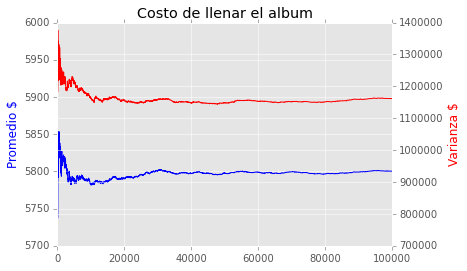

In [31]:
fig1,ax1 = subplots()
ax1.plot(M,Media,'b')
ax1.set_ylabel('Promedio $',color='b')

ax2 = ax1.twinx()
ax2.plot(M,Varianza,'r')
ax2.set_ylabel('Varianza $',color='r')

title('Costo de llenar el album')

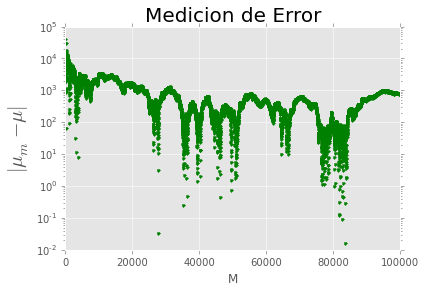

In [32]:
Mu_mean = mean(Media*c)
Delta = abs(Media*c-Mu_mean)
sigma = c*sqrt(Varianza)

# graficar
semilogy(M,Delta,'g.')
xlabel('M'); ylabel(r'$|\mu_m-\mu|$',size=20)
title('Medicion de Error',size=20)